# Алгоритмы интеллектуальной обработки больших объемов данных
## Домашнее задание №2 - Алгоритмы кластеризации


###### <hr\>
**Общая информация**

**Срок сдачи:** 23 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 23 октября, -4 балла после 06:00 30 октября, -6 баллов после 06:00 6 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

###### Задание 1 (4 балла)
Реализовать алгоритм кластеризации, который относится к вашему варианту. Проверить работоспособность алгоритма на "Iris". Сравните свой алгоритм кластеризации с алгоритмом из scikit-learn по времени выполнения, использую timeit. Ваша реализация не должна работать сильно дольше, а в идеале должна быть даже немного быстрее.

###### Задание 2 (2 балла)
Выбрать, имплементировать и использовать критерий качества

###### Задание 3 (3балла)
Применить алгоритм кластеризации к данным по странам.   
Подход следующий: фиксируем год, для каждой страны берём индикаторы по зафиксированному году, кластеризуем по индикаторам.   
Разбиение должно быть объяснимым, в противном случае, скорее всего нужно лучше настроить параметры кластеризации.   
Данные нужно скачать тут https://data.worldbank.org/data-catalog/world-development-indicators.   
Также необходимо показать, какие страны попали в общий кластер.
изуализировать результат с помощью T-SNE. Внимание! На полном объеме данных данный алгоритм может работать существенное время.

###### Задание 4 (1 балл)
Опишите в выводе почему и какие страны попали в общий кластер.

Основная задача этого задания - реализация одного из алгоритмов кластеризации. Кроме того, мы научимся подбирать параметры алгоритма, визуализируем результат кластеризации и попытаемся проанализировать природу полученных кластеров.

In [3]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.spatial as ss
import sklearn.cluster as sc
import sklearn.manifold as sm
import sklearn.datasets as ds
import sklearn.metrics as smt

import matplotlib.pyplot as plt
#import mpl_toolkits.basemap as bm

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

# Plotting config
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Реализация алгоритма

Алгоритм кластеризации, который необходимо реализовать, выбирается на основании Вашего порядкового номера в списке группы.

1. Авилова Екатерина
2. Адаменко Павел
3. Акиньщиков Алексей
4. Афанасьева Анастасия
5. Балес Александр
6. Беляев Владимир
7. Беспалова Анастасия
8. Богомолов Эмиль
9. Боднарюк Василий
10. Бучкин Александр
11. Валинуров Денис
12. Волков Глеб
13. Голенков Кирилл
14. Горбушин Михаил
15. Димов Илья
16. Докшина Елизавета
17. Дорожинский Владислав
18. Жирнов Михаил
19. Жолковский Евгений
20. Зайдель Петр
21. Зимнюков Максим
22. Иванов Илья
23. Кашипов Артем
24. Комов Евгений
25. Кошман Дима
26. Кузнецова Екатерина
27. Кулагин Алексей
28. Лавреновъ Виталiй
29. Лебедь Федор
30. Лешков Михаил
31. Лозинский Иван
32. Лоскутов Антон
33. Лютов Владимир
34. Мажаров Иван
35. Манкевич Павел
36. Муравьев Никита
37. Находнов Максим
38. Оплачко Николай
39. Павлов Евгений
40. Петряйкин Федор
41. Рахматуллин Фарид
42. Секретарев Тихон
43. Сенюшкин Дмитрий
44. Серов Николай
45. Смирнов Александр
46. Соловьев Павел
47. Сомов Иван
48. Спиркин Роман
49. Терёшина Мария
50. Торбунова Екатерина
51. Тюгаев Антон
52. Фельдман Борис
53. Филин Максим
54. Фролов Михаил
55. Хохлов Олег
56. Черемнов Андрей
57. Шевцов Антон
58. Шурыгин Александр

In [4]:
N = 26 # put your index here

In [5]:
algorithms = [
    u"Gaussian Mixture Model с использованием maximum a-posteriori для выбора кластера (параметр - k)",
    u"Hierarchical clustering с поддержкой single-linkage, complete-linkage, average-linkage (параметры - k, linkage)",
    u"DBSCAN. (параметры - epsilon, min_pts)"
]

my_algorithm = algorithms[N % len(algorithms)]
print u"Реализуем алгоритм кластеризации '%s'" % my_algorithm

Реализуем алгоритм кластеризации 'DBSCAN. (параметры - epsilon, min_pts)'


Алгоритм кластеризации должен удовлетворять следующему интерфейсу. Конструктор принимает набор параметров, необходимых для работы алгоритма кластеризации. Метод `fit` подсчитывает параметры модели и возвращает `self`. Метод `predict` возвращает вектор с индексами кластеров для поданных в него объектов `x`

## Задание 1

In [6]:
## Задание 1
from sklearn.base import BaseEstimator, ClusterMixin

class Clustering(BaseEstimator, ClusterMixin):
    """
    Implement clustering algorithm according 
    """
    
    def __init__(self, **kwargs):
             
        self.min_pts = kwargs.get('min_pts', 5)
        self.epsilon = kwargs.get('epsilon', 0.5)
        self.metric = kwargs.get('metric', 'euclidean')
        #metric_params
        
        
    def density_connected(self, point, cluster):
        
        for y in np.array(self.neighbors[point]):
            if self.labels.item(y) != -1:
                continue
            else:
                self.labels[y] = cluster
                if y in self.core_points:
                    self.density_connected(y,cluster)
            
    def fit(self, x, y=None):
        """
        Use data matrix x to compute model parameters
        """
        self.x_len = len(x)
        #working with indices in x as points
        
        self.labels = -np.ones(x.shape[0], dtype=int)
        self.core_points = np.empty(x.shape[0], dtype=int)
        self.neighbors = np.empty(x.shape[0], dtype='object')
        
        distances = ss.distance.cdist(x, x, self.metric)
        neighbors_list = [np.where(dist <= self.epsilon)[0] for dist in distances]
        self.neighbors[:] = neighbors_list
        self.neighbors = np.array(neighbors_list)
        neighbors_number = np.array([len(i) for i in self.neighbors])
        self.core_points = np.where(neighbors_number >= self.min_pts)[0]
       
        cluster = 0
       
        for point in self.core_points: #those without cluster
            if self.labels[point] != -1:
                continue
            else: 
                
                self.labels[point] = cluster
                self.density_connected(point, cluster)
            cluster+=1
       
                
        return self
    
    def predict(self, x):
        """
        Using computed model parameters predict cluster
        for all objects from x
        """
        return self.labels #[random.randint(0,5) for r in xrange(self.x_len)]
    
    def fit_predict(self, x, y=None):
        self.fit(x, y)
        return self.predict(x)

Сначала проверим реализованный алгоритм кластеризации на классическом наборе данных [Iris](http://www.wikiwand.com/en/Iris_flower_data_set). Загрузим данные (они включены в библиотеку sklearn) и посмотрим на то, как они выглядят в двух проекциях (для простоты используем 2 класса из 3).

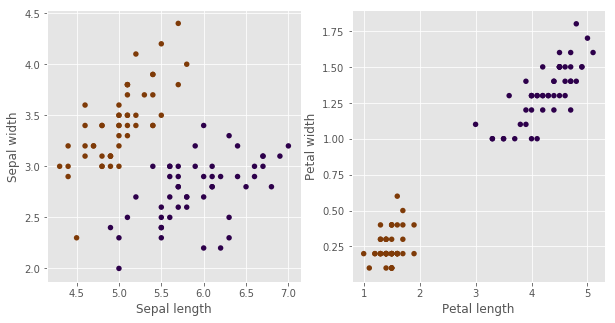

In [7]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=y_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Видно, что классы разделяются, поэтому можно надеяться, что наш алгоритм "найдет" кластеры, соответствующие исходным классам. Результат работы реализованного алгоритма кластеризации предлагается сравнить с эталонной кластеризацией. Для этого предлагается изучить метрику ([adjusted rand score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.adjusted_rand_score.html)). В случае если значение этой метрики отличается от 1, предлагается поработать над улучшением реализации своего алгоритма.

In [8]:
from timeit import timeit
executions = 1
model_sk = sc.DBSCAN(metric = 'euclidean')
t_sk = timeit('model_sk.fit_predict(x_iris)', "from __main__ import model_sk, x_iris", number=executions)
t_sk

0.2030348777770996

In [9]:
model = Clustering()
t = timeit('model.fit_predict(x_iris)', "from __main__ import model, x_iris", number=executions)
t

0.0493011474609375

In [10]:
pred_iris = sc.DBSCAN(metric='euclidean', min_samples=5, eps=0.7).fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

Adjusted Rand index for iris is: 1.00


In [11]:
pred_iris = Clustering(min_pts = 5, epsilon = 0.7).fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)

Adjusted Rand index for iris is: 1.00


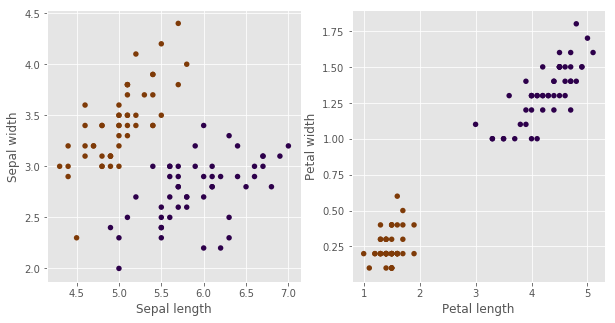

In [12]:
iris = ds.load_iris()
x_iris = iris.data[:100]
y_iris = iris.target[:100]

pl.figure(figsize=(10, 5))

pl.subplot(1, 2, 1)
pl.scatter(x_iris[:, 0], x_iris[:, 1], c=pred_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

pl.subplot(1, 2, 2)
pl.scatter(x_iris[:, 2], x_iris[:, 3], c=pred_iris, cmap=pl.cm.PuOr, lw=0, s=30)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
pl.show()

Выбрать и реализовать критерий качества, на основании которого будут подбираться параметры модели. Варианты критериев:
- Инерция (сумма квадратов расстояний от каждой из точек до ближайшего к этой точке центроида)
- Средний диаметр (максимальное расстояние между точками в кластере) или радиус (расстояние от центроида до самой дальней от него точки в кластере)
- Sihouette

**Критерий качества необходимо выбрать таким образом, чтобы он подходил для реализованного алгоритма**

## Задание 2
Silhouette не использует центроиды, а проверяет расстояния между точками внутри кластера и вразных кластерах, 
что соответствует идее плотности, лежащей в основе dbscan (точки одного кластера располагаются скученно)

In [13]:
## Задание 2
#silhouette
def quality(x, y, show_error = 0):
    """
    Implement quality criterion of your choice
    """
    cluster_labels = np.unique(y)
    if len(cluster_labels) < 2:
        if (show_error):
            print ("Silhouette works with more than 2 labels")
        return
    clusters = []
    in_cluster_distances = np.zeros(len(y))
    nearest_cluster_distances = np.inf + np.zeros(len(y))
    clusters = [np.where(y== i)[0] for i in cluster_labels]
    distances = ss.distance.cdist(x, x, 'euclidean')

    for sample in range(len(x)):
        other_elements_number = len(clusters[y[sample]]) - 1
        if other_elements_number != 0:
            in_cluster_distances[sample] = np.sum(distances[sample, clusters[y[sample]]]) / other_elements_number
        for label in range(len(cluster_labels)):
            if label != y[sample]:
                other_label_distance = np.mean(distances[sample, clusters[label]])
                nearest_cluster_distances[sample] = np.minimum(
                        nearest_cluster_distances[sample], other_label_distance)
                
    silhouettes =  nearest_cluster_distances - in_cluster_distances
    silhouettes /= np.maximum(nearest_cluster_distances, in_cluster_distances) 
    
    return np.mean(silhouettes)

In [14]:
quality (x_iris, pred_iris)

0.7369368160680051

In [15]:
smt.silhouette_score(x_iris, pred_iris)

0.73693681602317374

Применим критерий для выбора параметров алгоритма. Предлагается изменить следующий код таким образом, чтобы кластеризация вызывалась с верным набором параметров. На графике можно будет увидеть зависимость критерия от параметров алгоритма. Необходимо выбрать оптимальные значения этих параметров.

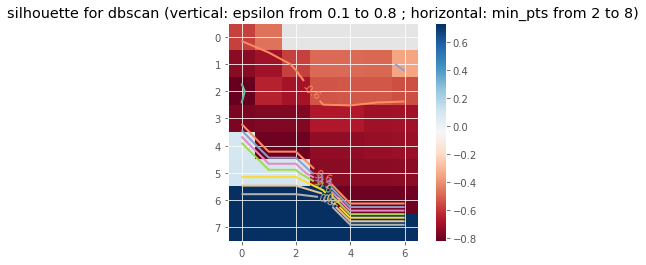

In [16]:
from numpy import exp,arange
from pylab import meshgrid,cm,imshow,contour,clabel,colorbar,axis,title,show

# the function that I'm going to plot
def z_func(min_pts, epsilon):
    cls = Clustering(min_pts = min_pts, epsilon = epsilon)
    y = cls.fit_predict(x_iris)
    silhouette = quality(x_iris,y)
    if (silhouette != silhouette):
        return 0
    return silhouette

 
x_values = arange(2, 9, 1)
y_values = arange(0.1,0.9,0.1)

#Z = z_func(X, Y) # evaluation of the function on the grid
#print len (x_values)
#print len(y_values)
Z = np.zeros((len(y_values), len(x_values)))
for x in range(len(x_values)):
    for y in range(len(y_values)):
        #print x
        Z[y, x] = z_func(x_values[x], y_values[y])

im = imshow(Z,cmap=cm.RdBu) # drawing the function
# adding the Contour lines with labels
cset = contour(Z,arange(-1,1.5,0.2),linewidths=2,cmap=cm.Set2)
clabel(cset,inline=True,fmt='%1.1f',fontsize=10)
colorbar(im) # adding the colobar on the right
# latex fashion title
title('silhouette for dbscan (vertical: epsilon from 0.1 to 0.8 ; horizontal: min_pts from 2 to 8)')
show()

In [17]:
pred_iris = Clustering(min_pts = 5, epsilon = 0.8).fit_predict(x_iris)
print "Adjusted Rand index for iris is: %.2f" % smt.adjusted_rand_score(y_iris, pred_iris)
print "Silhouette score (custom) for iris is: %.2f" % quality(x_iris, pred_iris)
print "Silhouette score (library) for iris is: %.2f" % smt.silhouette_score(x_iris, pred_iris)

Adjusted Rand index for iris is: 1.00
Silhouette score (custom) for iris is: 0.74
Silhouette score (library) for iris is: 0.74


# Задание 3

In [18]:
data = pd.read_csv('WDIData.csv')

IOError: File WDIData.csv does not exist

#best year is when filling indicator values with mean gives least number of nan columns
columns = {}
for i in range (1960, 2017):
    year = str(i)
    data_used = data[['Country Code', 'Indicator Code', year]].pivot(index='Country Code', columns='Indicator Code', values=year)
    data_used = data_used.fillna(data_used.mean())

    columns[year] = data_used.isnull().any().sum(axis=0)

columns

{'1960': 1144,
 '1961': 1110,
 '1962': 1093,
 '1963': 1089,
 '1964': 1090,
 '1965': 1080,
 '1966': 1085,
 '1967': 1075,
 '1968': 1085,
 '1969': 1074,
 '1970': 704,
 '1971': 709,
 '1972': 679,
 '1973': 687,
 '1974': 672,
 '1975': 658,
 '1976': 657,
 '1977': 645,
 '1978': 664,
 '1979': 647,
 '1980': 606,
 '1981': 616,
 '1982': 619,
 '1983': 624,
 '1984': 613,
 '1985': 603,
 '1986': 592,
 '1987': 577,
 '1988': 572,
 '1989': 542,
 '1990': 426,
 '1991': 436,
 '1992': 415,
 '1993': 430,
 '1994': 423,
 '1995': 380,
 '1996': 382,
 '1997': 382,
 '1998': 314,
 '1999': 294,
 '2000': 211,
 '2001': 258,
 '2002': 238,
 '2003': 237,
 '2004': 202,
 '2005': 139,
 '2006': 145,
 '2007': 122,
 '2008': 126,
 '2009': 125,
 '2010': 91,
 '2011': 113,
 '2012': 111,
 '2013': 129,
 '2014': 91,
 '2015': 205,
 '2016': 714}

In [19]:
data_used = data[['Country Code', 'Indicator Code', '2010']].pivot(index='Country Code', columns='Indicator Code', values='2010')
data_used_before_filling = data_used
data_used = data_used.fillna(data_used.mean())
data_used = data_used.dropna(axis=1, how='all')
data_used

NameError: name 'data' is not defined

In [20]:
data_used.to_csv('2010_filled.csv')

NameError: name 'data_used' is not defined

In [21]:
data_used = pd.read_csv('2014_filled.csv')
x_train = data_used.iloc[:, 1:].values
#x = (x - x.mean(axis=0))/x.std(axis = 0)
index_non_zero_std = np.where(x_train.std(axis=0)!=0)[0]
x_train[:,index_non_zero_std] = (x_train[:,index_non_zero_std] - x_train[:,index_non_zero_std].mean(axis=0))/x_train[:,index_non_zero_std].std(axis = 0)

In [22]:
distances = ss.distance.cdist(x_train, x_train, 'euclidean')
print distances.mean()
print distances.min()
print distances.max()
epsilon = 40
neighbors_list = [np.where(dist <= epsilon)[0] for dist in distances]
neighbors_number = np.array([len(i) for i in neighbors_list])
print neighbors_number.mean()
print neighbors_number.min()
print neighbors_number.max()


50.2199466381
0.0
183.235173621
73.3863636364
1
201


In [23]:
pred_x = Clustering(min_pts=2, epsilon=26).fit_predict(x_train)
pred_x

array([ 0, -1, -1, -1,  0,  0, -1, -1, -1,  0,  0,  1,  2, -1, -1,  3, -1,
       -1, -1,  0, -1, -1, -1, -1,  0,  0, -1, -1,  0, -1, -1, -1, -1,  1,
        0, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0,  2, -1, -1, -1, -1,  4, -1,  5, -1, -1,  5, -1,
        6,  0, -1,  5,  0,  2,  0,  3,  0,  0,  0, -1, -1, -1,  0, -1, -1,
       -1, -1, -1,  0,  0, -1,  0,  0,  7, -1, -1,  0,  0, -1,  0, -1, -1,
        0,  0, -1,  0,  0, -1,  0, -1, -1, -1, -1, -1,  6, -1, -1, -1, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,  0,
       -1, -1, -1, -1,  4,  0, -1,  0, -1,  0,  0,  0, -1, -1, -1,  0, -1,
        0, -1, -1, -1, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1, -1, -1, -1,
        0, -1, -1,  0,  2, -1, -1,  0,  1,  7, -1,  0, -1, -1, -1, -1,  0,
        0,  0,  0,  0,  0,  6, -1, -1,  0,  7,  0, -1,  0, -1, -1,  0, -1,
       -1, -1, -1, -1, -1, -1,  0, -1, -1,  0, -1,  0,  0, -1, -1,  0,  0,
       -1, -1,  0,  0, -1

In [24]:
country_names = pd.read_csv('WDICountry.csv')
country_names = country_names[['Country Code', 'Short Name']]


In [25]:
codes = data_used['Country Code']
codes = np.array([country_names[country_names['Country Code'] == code]['Short Name'] for code in codes])


In [26]:
cluster_labels = np.unique(pred_x)
clusters = [codes[np.where(pred_x== i)[0]] for i in cluster_labels]

In [27]:
clusters[0]

array([1    Afghanistan
Name: Short Name, dtype: object,
       2    Angola
Name: Short Name, dtype: object,
       3    Albania
Name: Short Name, dtype: object,
       6    United Arab Emirates
Name: Short Name, dtype: object,
       7    Argentina
Name: Short Name, dtype: object,
       8    Armenia
Name: Short Name, dtype: object,
       13    Azerbaijan
Name: Short Name, dtype: object,
       14    Burundi
Name: Short Name, dtype: object,
       16    Benin
Name: Short Name, dtype: object,
       17    Burkina Faso
Name: Short Name, dtype: object,
       18    Bangladesh
Name: Short Name, dtype: object,
       20    Bahrain
Name: Short Name, dtype: object,
       21    The Bahamas
Name: Short Name, dtype: object,
       22    Bosnia and Herzegovina
Name: Short Name, dtype: object,
       23    Belarus
Name: Short Name, dtype: object,
       26    Bolivia
Name: Short Name, dtype: object,
       27    Brazil
Name: Short Name, dtype: object,
       29    Brunei
Name: Short Name, dtype

Этот кластер состоит из точек, отнесенных DBSCAN к шуму; здесь и монстры вроде США, и не столь процветающие страны вроде Узбекистана.

In [28]:
clusters[1]

array([0    Aruba
Name: Short Name, dtype: object,
       4    Andorra
Name: Short Name, dtype: object,
       5    Arab World
Name: Short Name, dtype: object,
       9    American Samoa
Name: Short Name, dtype: object,
       10    Antigua and Barbuda
Name: Short Name, dtype: object,
       19    Bulgaria
Name: Short Name, dtype: object,
       24    Belize
Name: Short Name, dtype: object,
       25    Bermuda
Name: Short Name, dtype: object,
       28    Barbados
Name: Short Name, dtype: object,
       34    Central Europe and the Baltics
Name: Short Name, dtype: object,
       36    Channel Islands
Name: Short Name, dtype: object,
       45    Cabo Verde
Name: Short Name, dtype: object,
       47    Caribbean small states
Name: Short Name, dtype: object,
       49    Curaçao
Name: Short Name, dtype: object,
       50    Cayman Islands
Name: Short Name, dtype: object,
       52    Czech Republic
Name: Short Name, dtype: object,
       55    Dominica
Name: Short Name, dtype: object,
 

Большой кластер "средних" стран

In [29]:
clusters[2]

array([11    Australia
Name: Short Name, dtype: object,
       33    Canada
Name: Short Name, dtype: object,
       177    New Zealand
Name: Short Name, dtype: object], dtype=object)

Наиболее развитые страны из Королевств Содружества (не хватает лишь самой Великобритании)

In [30]:
clusters[3]

array([12    Austria
Name: Short Name, dtype: object,
       56    Denmark
Name: Short Name, dtype: object,
       73    Finland
Name: Short Name, dtype: object,
       173    Netherlands
Name: Short Name, dtype: object], dtype=object)

"Не южная" вполне себе процветающая Европа. (Лишь в Финляндии язык не из германских)

In [31]:
clusters[4]

array([15    Belgium
Name: Short Name, dtype: object,
       75    France
Name: Short Name, dtype: object], dtype=object)

Основная франкоговорящая Европа.

In [32]:
clusters[5]

array([61    East Asia & Pacific
Name: Short Name, dtype: object,
       139    Late-demographic dividend
Name: Short Name, dtype: object,
       227    East Asia & Pacific (IDA & IBRD)
Name: Short Name, dtype: object], dtype=object)

Восточная Азия

In [33]:
clusters[6]

array([63    Europe & Central Asia
Name: Short Name, dtype: object,
       66    Euro area
Name: Short Name, dtype: object,
       71    European Union
Name: Short Name, dtype: object], dtype=object)

Европа

In [34]:
clusters[7]

array([68    Spain
Name: Short Name, dtype: object,
       113    Italy
Name: Short Name, dtype: object,
       191    Portugal
Name: Short Name, dtype: object], dtype=object)

Южная Европа (с большим государственным долгом)

In [35]:
clusters[8]

array([93    High income
Name: Short Name, dtype: object,
       178    OECD members
Name: Short Name, dtype: object,
       195    Post-demographic dividend
Name: Short Name, dtype: object], dtype=object)

(члены Организации экономи́ческого сотрудничества и развития; развитые страны с высоким доходом)

In [36]:
X_embedded = sm.TSNE(n_components=2).fit_transform(x_train)
X_embedded.shape

(264, 2)

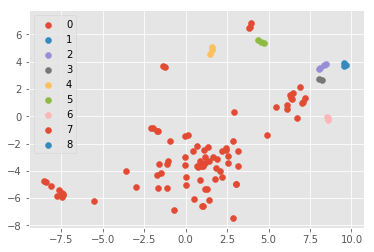

In [37]:
for i in range(len(cluster_labels)):
    idx = pred_x == i
    plt.scatter(X_embedded[idx, 0], X_embedded[idx, 1], label=i)
    
plt.legend()

## Задание 4

In [38]:
## Задание 4
index = list(np.where(pred_x==0)[0])
cluster1 = data_used_before_filling.iloc[index]
print "среднее по столбцу (чем ближе к 1, тем больше nan-ов в столбце)"
summed = cluster1.isnull().mean()
summed

NameError: name 'data_used_before_filling' is not defined

In [ ]:
summed[summed > 0.7]

в 656 столбцах от 70% nan-ов

In [ ]:
index = list(np.where(pred_x==0)[0])
print "среднее по столбцу (чем ближе к 1, тем больше nan-ов в столбце)"
summed = data_used_before_filling.isnull().mean()
summed[summed > 0.7]

Для всех данных число таких столбцов меньше

Многие страны попали в кластер "середняков" из-за того, что их данные были полученые как средние по столбцам вместо nan

Поздравляем, Вы завершили домашние задания по модулю "Алгоритмы кластеризации". Надеемся, что это было интересно.